In [182]:
#importing libraries to generate a dataframe from csv data and perform preprocrssing 
import pandas as pd
import numpy as np

In [183]:
#generating dataframe using csv file
train = pd.read_csv('houses_dataset.csv')
#top 5 rows
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [184]:
#knowing data types and column names
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

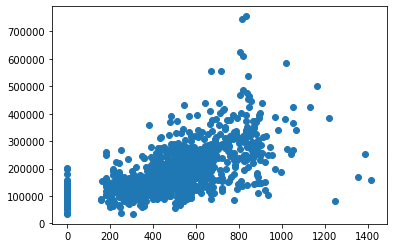

In [185]:
#Delete all the outlier data for the GarageArea field
# to delete outlers plot the data and remove the anomalies
import matplotlib.pyplot as plt
plt.scatter(train['GarageArea'], train['SalePrice'])
plt.show()

In [186]:
#1.Delete all the outlier data for the GarageArea field
train=train[(train['GarageArea']<1200) & (train['GarageArea']>0)]

#data = train.select_dtypes(include=[np.number]).interpolate().dropna()

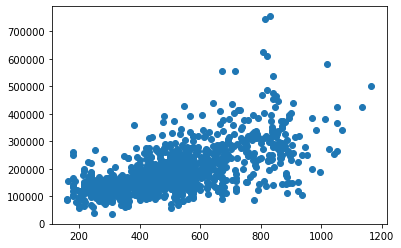

In [187]:
#after removing the outlier data for the GarageArea field
plt.scatter(train['GarageArea'], train['SalePrice'])
plt.show()

In [188]:
#3 Using simple regression select one feature that is positively correlated with ‘SalePrice’ create a regression model and Plot the regression line between the two features.
#finding Correlations
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Positive Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[:], '\n')
print("\nNegative Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

Positive Correlation:
SalePrice        1.000000
OverallQual      0.789406
GrLivArea        0.726316
GarageCars       0.642033
TotalBsmtSF      0.636461
GarageArea       0.629341
1stFlrSF         0.614336
FullBath         0.556291
TotRmsAbvGrd     0.542040
YearBuilt        0.506455
YearRemodAdd     0.504142
GarageYrBlt      0.486758
MasVnrArea       0.467348
Fireplaces       0.451479
BsmtFinSF1       0.394991
LotFrontage      0.365596
OpenPorchSF      0.336006
2ndFlrSF         0.316271
WoodDeckSF       0.313853
HalfBath         0.272175
LotArea          0.258193
BsmtFullBath     0.226390
BsmtUnfSF        0.213765
BedroomAbvGr     0.166277
ScreenPorch      0.100103
PoolArea         0.099553
MoSold           0.043766
3SsnPorch        0.039489
LowQualFinSF    -0.008278
MiscVal         -0.016830
BsmtFinSF2      -0.022998
BsmtHalfBath    -0.025465
Id              -0.026709
YrSold          -0.027573
MSSubClass      -0.076212
OverallCond     -0.096215
EnclosedPorch   -0.120200
KitchenAbvGr    

In [216]:
#building a simple linear regression model to Evaluate the model using MAE, MSE, RMSE and R2 score. 
#GarageArea vs SalePrice
data = train[['GarageArea','SalePrice','Id']].dropna()
y = np.log(data.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
y.dtype
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   GarageArea  1374 non-null   int64
dtypes: int64(1)
memory usage: 21.5 KB


In [217]:

#spliting data to train and test the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

In [234]:
#training the model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions=model.predict(X_test)

Text(0, 0.5, 'SalePrice')

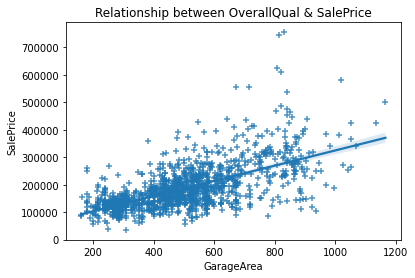

In [235]:
import seaborn as sns
#linear regression line
sns.regplot(x=data.GarageArea, y=data.SalePrice, marker='+')
plt.title('Relationship between OverallQual & SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

In [236]:
#2. Evaluate the model using MAE, MSE, RMSE and R2 score.

In [237]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,predictions)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('r^2:', r2)

Mean Absolute Error: 42746.7437488328
Mean Squared Error: 3996316864.9277706
Root Mean Squared Error: 63216.428758098715
r^2: 0.37090784920922426
